# 28 Nov 23 - Activity: Model of Two Bodies in Thermal Contact

We've developed an equation for the number of ways we can arrange a small amount of quanta on a small number of oscillators. The formula we developed for arranging $q$ on $N$ oscillators is given below:

$$\Omega = \dfrac{(q+N-1)!}{q!(N-1)!}$$

These calculations are only tractable with pencil and paper when the number of quanta and oscillators is low. For even a few hundred oscillators and quanta the calculations can only be done on a computer. In fact, we will see with this model how we can easily blow out our computational tools as well.

## Microstates and Macrostates

Remember that a particular arrangement of quanta on oscillators is a microstate. That is, atom 1 has 3 oscillators with 1 quanta each on oscillator 1 and oscillator 2. But another microstate with quanta each on oscillator 2 and 3 would be the same energy macrostate for atom 1. We typically use energy for our marker for macrostates, but this doesn't have to be the case because micro and macrostate ideas apply well beyond thermal physics to information theory, data science, networks, and general probability theory.

## The setup

Consider two blocks of material made of simple atomic oscillators that can take on quanta of energy. One block has 200 such atoms, and the other block has 300 such atoms. There are 400 quanta of energy that can be distributed between the two. 

Before we computed the number of ways for a pair of systems, showing that multiplying the ways was how to find the total number. Here we consider the number of total atoms as given, so the number of ways is a function of the number of energy quanta distributed on atom 1 ($q_1$) and the total available ($q_{tot}$).

$$\Omega_T(q_{tot},q_1) = \Omega_1(q_1)*\Omega_2(q_{tot}-q_1)$$

Your goal is to compute the number of total ways to distribute $q_1$ quanta given $q_{tot}$ available and plotting the distribution $\Omega_T$ as a function of $q_1$.

Some steps:

* Write a function that computes the number of ways given a $q$ and $N$
* Test that function on small $q$ and $N$ that we've used
* Write a function that calls the above one but sweeps through the number of quanta $q$
* Plot the distribution of number of ways for the 200/300 oscillator setup with 400 quanta
* Try to break your code by increasing these numbers.

In [1]:
## your code here
import numpy as np
import matplotlib.pyplot as plt

**Compute the number of ways given a $q$ and $N$**

In [79]:
def calculate_ways(q, N):
    """
    Calculate the number of ways to arrange q quanta on N oscillators.
    
    Inputs:
    q (int): Number of quanta
    N (int): Number of oscillators
    
    Returns:
    int: Number of ways to arrange q quanta on N oscillators
    """
    ways = np.math.factorial(q + N - 1) / (np.math.factorial(q) * np.math.factorial(N - 1))
    return ways

# Test the function on small q and N
test_q = 3
test_N = 4
test_result = calculate_ways(test_q, test_N)
print(f"Number of ways for q={test_q} and N={test_N}: {test_result}")

Number of ways for q=3 and N=4: 20.0


**Calculate the total number of ways for the given setup of two blocks.**

In [84]:
def total_ways(q_tot, q1_range, N1, N2):
    """
    Calculate the total number of ways to distribute q quanta between two blocks.
    
    Parameters:
    q_tot (int): Total number of quanta
    q1_range (range): Range of q1 values to consider
    N1 (int): Number of oscillators in block 1
    N2 (int): Number of oscillators in block 2
    
    Returns:
    tuple: Tuple containing lists of ways for block 1 and block 2 for each q1 value in the given range
    """
    ways_list_1 = [calculate_ways(q1, N1) for q1 in q1_range]
    ways_list_2 = [calculate_ways(q_tot - q1, N2) for q1 in q1_range]
    ways_list_total = [calculate_ways(q1, N1) * calculate_ways(q_tot - q1, N2) for q1 in q1_range]
    return ways_list_1, ways_list_2, ways_list_total

# Test the modified function with a small range of q1 values
q_tot_test = 400
q1_range_test = range(q_tot_test + 1)
N1_test = 200
N2_test = 300
total_ways_test_1 = total_ways(q_tot_test, q1_range_test, N1_test, N2_test)
print(f"Total ways for q_tot={q_tot_test}, N1={N1_test}, N2={N2_test}")

# Test the function with a small range of q1 values
q_tot_test = 300
q2_range_test = range(q_tot_test + 1)
N1_test = 150
N2_test = 200
total_ways_test_2 = total_ways(q_tot_test, q2_range_test, N1_test, N2_test)
print(f"Total ways for q_tot={q_tot_test}, N1={N1_test}, N2={N2_test}")

Total ways for q_tot=400, N1=200, N2=300
Total ways for q_tot=300, N1=150, N2=200


**Plot the distribution of the number of ways for the given setup**

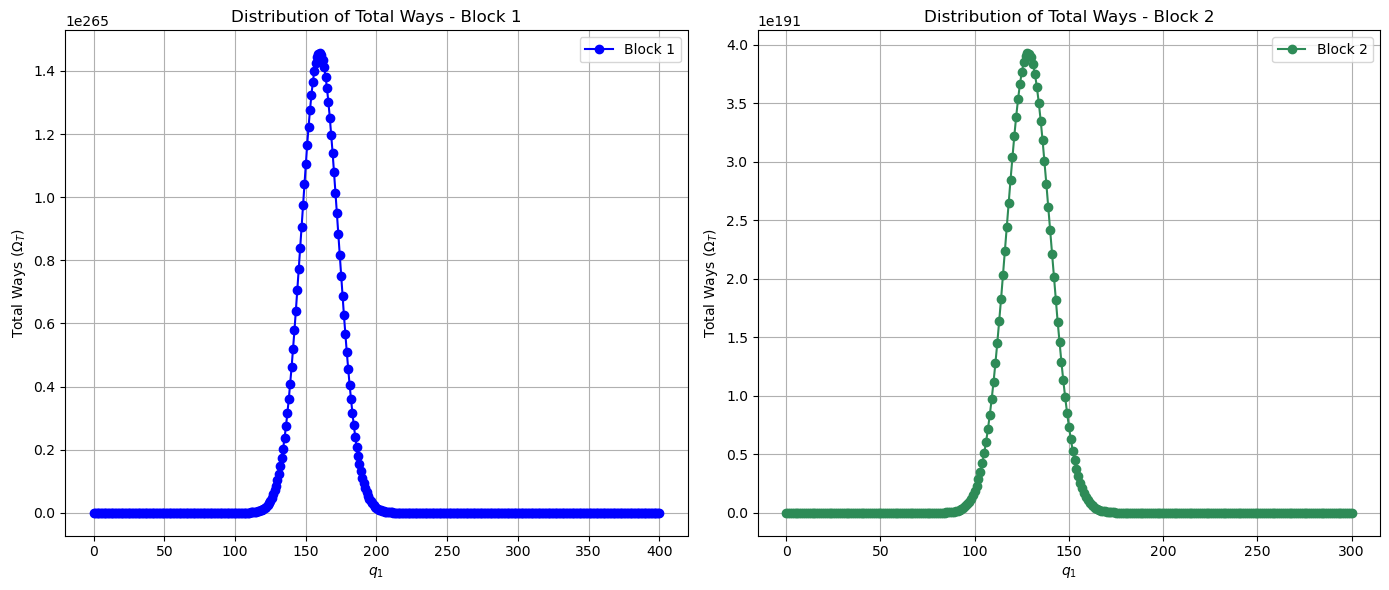

In [87]:
# Plot the distribution in horizontal subplots
plt.figure(figsize=(14, 6))

# Plot for Setup 1
plt.subplot(1, 2, 1)
plt.plot(q1_range_test, total_ways_test_1[2], marker='o', color='blue', label='Setup 1')
plt.grid()
plt.xlabel('$q_1$')
plt.ylabel('Total Ways ($\Omega_T$)')
plt.title('Distribution of Total Ways - Setup 1')
plt.legend()

# Plot for Setup 2
plt.subplot(1, 2, 2)
plt.plot(q2_range_test, total_ways_test_2[2], marker='o', color='seagreen', label='Setup 2')
plt.grid()
plt.xlabel('$q_1$')
plt.ylabel('Total Ways ($\Omega_T$)')
plt.title('Distribution of Total Ways - SEtup 2')
plt.legend()

# Adjust layout to prevent overlap of subplots
plt.tight_layout()

**Entropy Calculations**

Text(0.5, 1.0, 'Entropy of $\\Omega_T$')

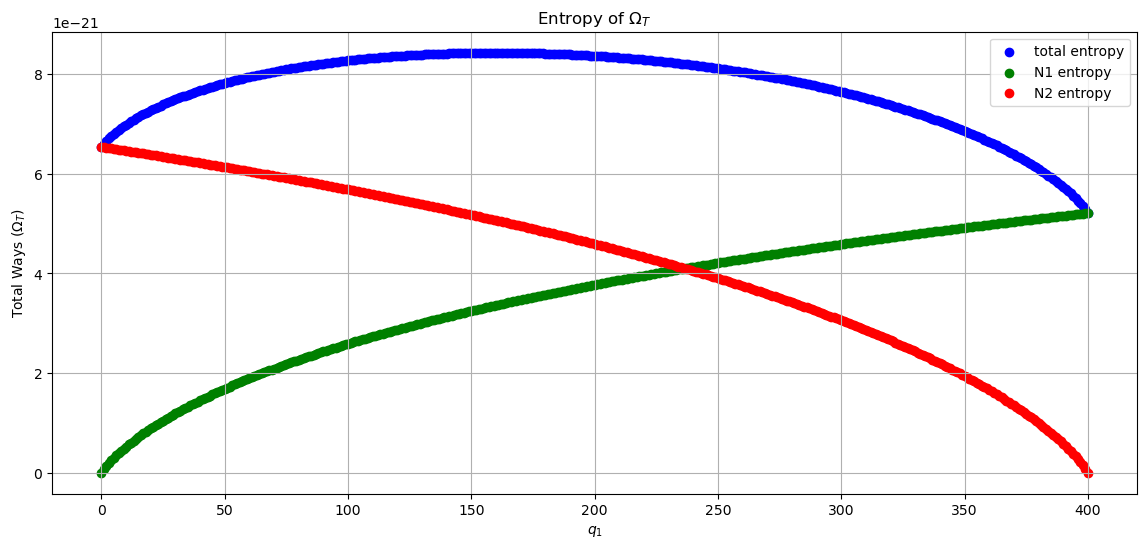

In [104]:
import scipy.constants as sc

q_tot_test = 400
q1_range_test = range(q_tot_test + 1)
N1_test = 200
N2_test = 300
total_ways_test = total_ways(q_tot_test, q1_range_test, N1_test, N2_test)

entropy_total = sc.Boltzmann * np.log(total_ways_test[2])
entropy_n1 = sc.Boltzmann * np.log(total_ways_test[0])
entropy_n2 = sc.Boltzmann * np.log(total_ways_test[1])

# Plot the distribution
plt.figure(figsize=(14, 6))
plt.scatter(q1_range_test, entropy_total, color='blue', label = 'total entropy')
plt.scatter(q1_range_test, entropy_n1, color='green', label = 'N1 entropy')
plt.scatter(q1_range_test, entropy_n2, color='red', label = 'N2 entropy')
plt.grid()
plt.legend()
plt.xlabel('$q_1$')
plt.ylabel('Total Ways ($\Omega_T$)')
plt.title('Entropy of $\Omega_T$')